In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from scipy.stats import norm
warnings.filterwarnings("ignore")

fp = "M:/DataSet/usaccident/real/fillna.csv"

In [2]:
data = pd.read_csv(fp,index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212712 entries, 146278 to 4232214
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     212712 non-null  object 
 1   Source                 212712 non-null  object 
 2   TMC                    212712 non-null  float64
 3   Severity               212712 non-null  int64  
 4   Start_Lat              212712 non-null  float64
 5   Start_Lng              212712 non-null  float64
 6   Distance(mi)           212712 non-null  float64
 7   Description            212712 non-null  object 
 8   Street                 212712 non-null  object 
 9   Side                   212712 non-null  object 
 10  City                   212712 non-null  object 
 11  County                 212712 non-null  object 
 12  Zipcode                212712 non-null  object 
 13  Airport_Code           212712 non-null  object 
 14  Temperature(F)         212712 

In [3]:
data.drop(['ID','Description'],axis=1,inplace=True)

1.EDA
=

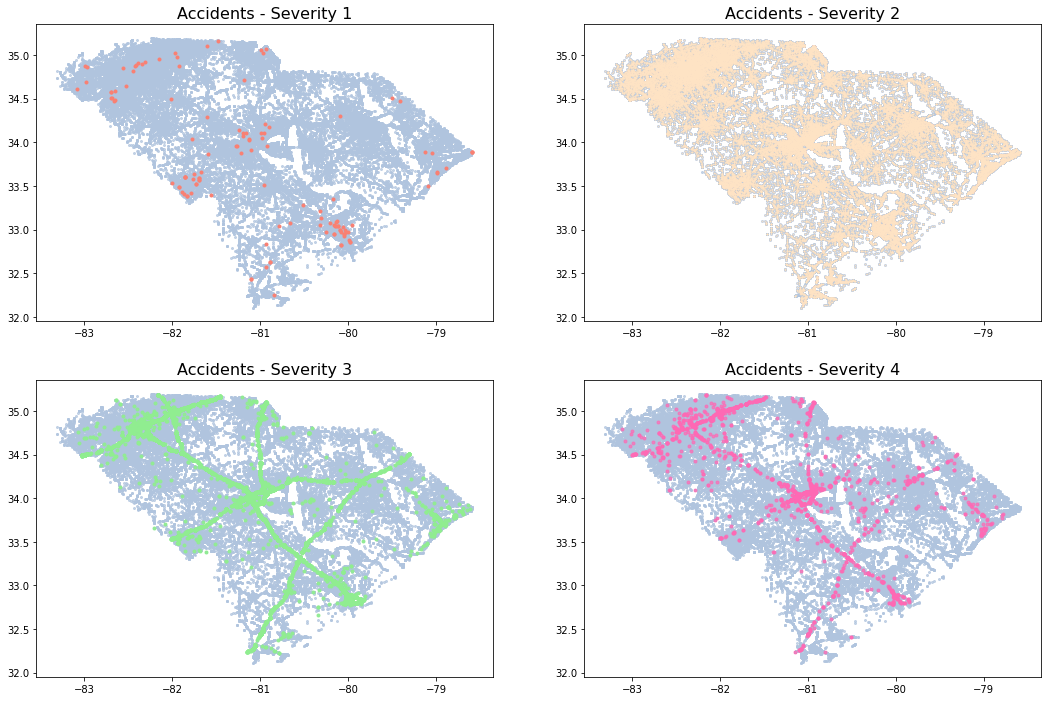

In [4]:
data1 = data[data['Severity'] == 1]
data2 = data[data['Severity'] == 2]
data3 = data[data['Severity'] == 3]
data4 = data[data['Severity'] == 4]

fig,ax = plt.subplots(2,2,figsize=(18,12))
ax[0,0].plot(data['Start_Lng'],data['Start_Lat'],linestyle='',marker='o',
        markersize=2,color="lightsteelblue",alpha=0.7,label="Accident Sites")
ax[0,0].plot(data1['Start_Lng'],data1['Start_Lat'],linestyle='',marker='o',
        markersize=3,color="salmon",alpha=1,label="Severity 1")

ax[0,1].plot(data['Start_Lng'],data['Start_Lat'],linestyle='',marker='o',
        markersize=2,color="lightsteelblue",alpha=0.7,label="Accident Sites")
ax[0,1].plot(data2['Start_Lng'],data2['Start_Lat'],linestyle='',marker='o',
        markersize=1,color="bisque",alpha=0.5,label="Severity 2")

ax[1,0].plot(data['Start_Lng'],data['Start_Lat'],linestyle='',marker='o',
        markersize=2,color="lightsteelblue",alpha=0.7,label="Accident Sites")
ax[1,0].plot(data3['Start_Lng'],data3['Start_Lat'],linestyle='',marker='o',
        markersize=3,color="lightgreen",alpha=0.9,label="Severity 3")

ax[1,1].plot(data['Start_Lng'],data['Start_Lat'],linestyle='',marker='o',
        markersize=2,color="lightsteelblue",alpha=0.7,label="Accident Sites")
ax[1,1].plot(data4['Start_Lng'],data4['Start_Lat'],linestyle='',marker='o',
        markersize=3,color="hotpink",alpha=0.7,label="Severity 4")

ax[0,0].set_title("Accidents - Severity 1",size=16)
ax[0,1].set_title("Accidents - Severity 2",size=16)
ax[1,0].set_title("Accidents - Severity 3",size=16)
ax[1,1].set_title("Accidents - Severity 4",size=16)
plt.show()

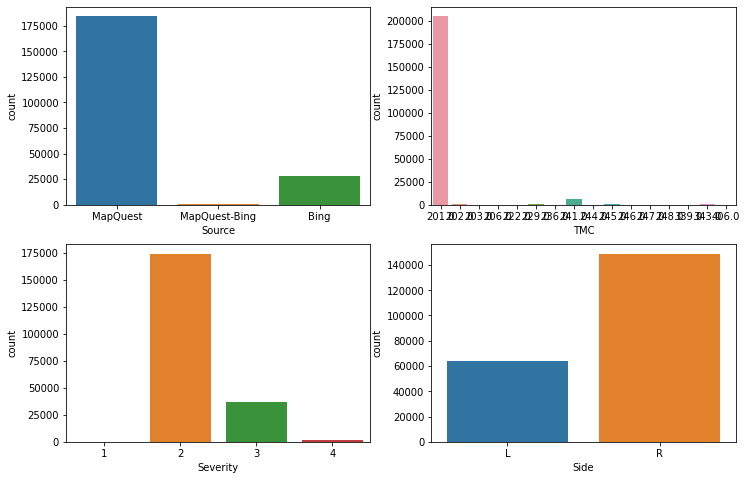

In [5]:
cols = ['Source', 'TMC', 'Severity', 'Side']
fig, ax = plt.subplots(2,2,figsize=(12,8))
r,c = 0,0
for col in cols:
    sns.countplot(data[col],ax=ax[r,c])
    if c == 1:
        c = 0
        r += 1
    else: c += 1 
plt.show()

In [6]:
data['Severity'].value_counts()

2    174307
3     36636
4      1644
1       125
Name: Severity, dtype: int64

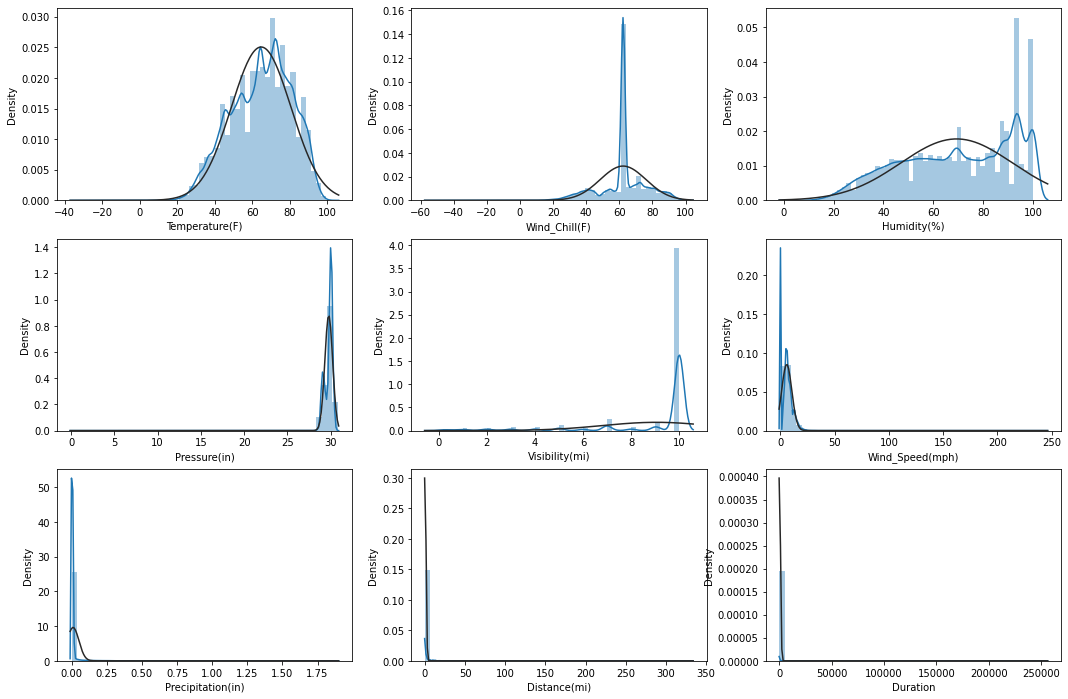

In [7]:
cols = ['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)',
        'Wind_Speed(mph)','Precipitation(in)','Distance(mi)','Duration']
fig, ax = plt.subplots(3,3,figsize=(18,12))
r,c = 0,0
for col in cols:
    sns.distplot(data[col],fit=norm,kde=True,ax=ax[r,c])
    if c == 2:
        c = 0
        r += 1
    else: c += 1 
plt.show()

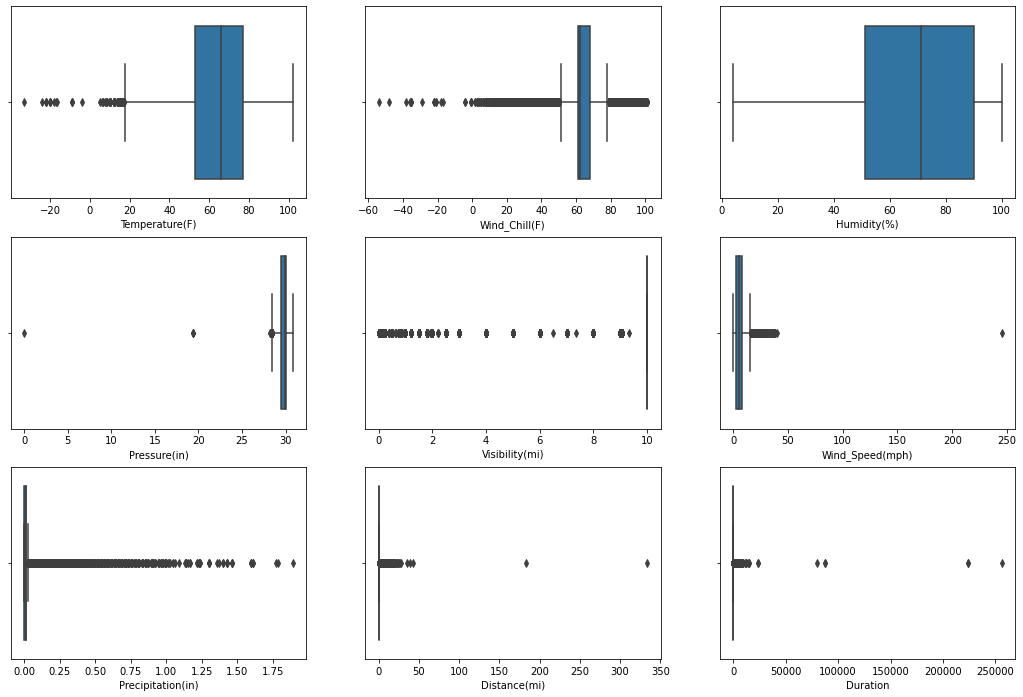

In [8]:
cols = ['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)',
        'Wind_Speed(mph)','Precipitation(in)','Distance(mi)','Duration']
fig, ax = plt.subplots(3,3,figsize=(18,12))
r,c = 0,0
for col in cols:
    sns.boxplot(data[col],ax=ax[r,c])
    if c == 2:
        c = 0
        r += 1
    else: c += 1 
plt.show()

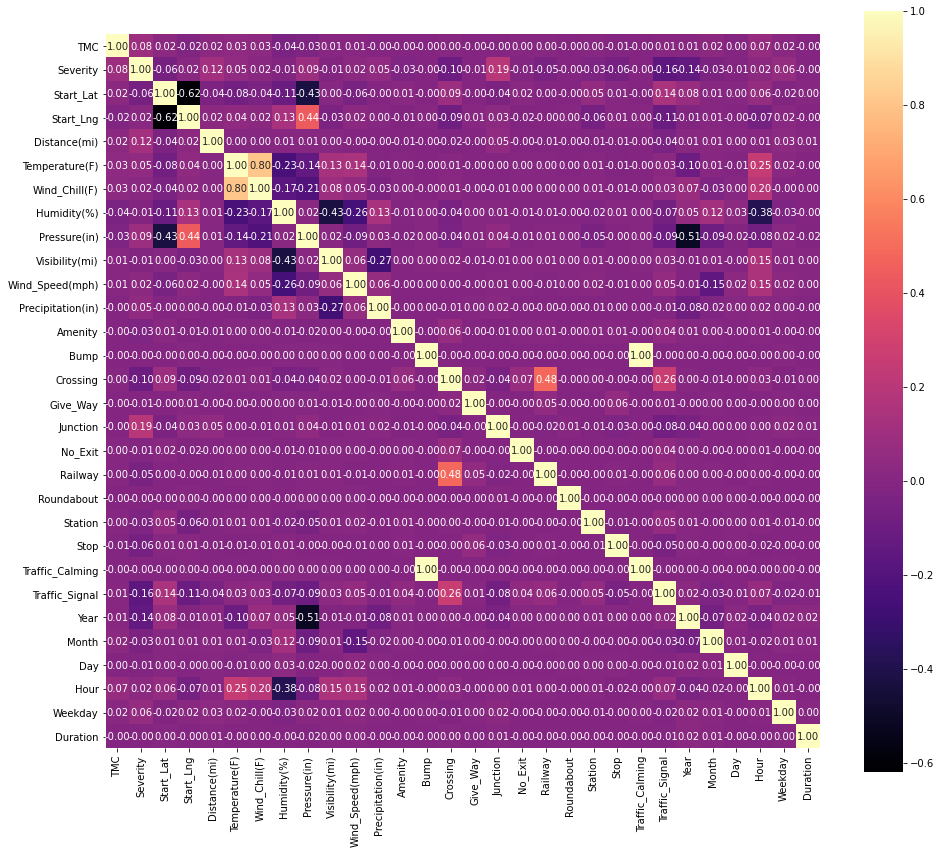

In [9]:
plt.figure(figsize=(16,14))
sns.heatmap(data.corr(),annot=True,cmap="magma",square=True,fmt=".2f")
plt.show()

2.离群点处理
=

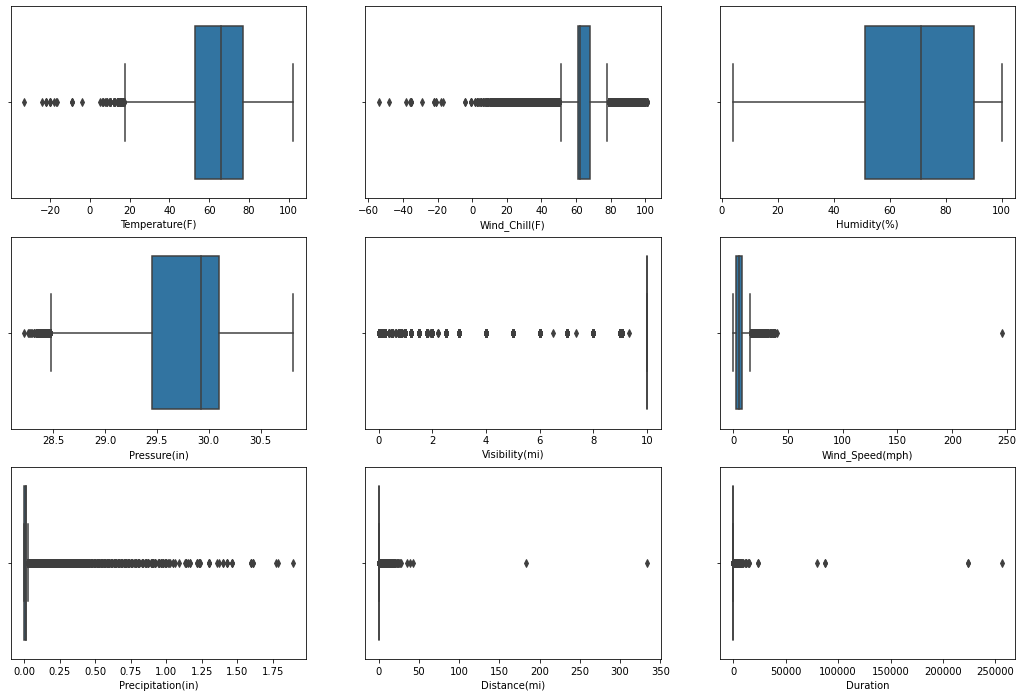

In [10]:
mask = data['Pressure(in)'] < 25
data.drop(data[mask].index,inplace=True)

cols = ['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)',
        'Wind_Speed(mph)','Precipitation(in)','Distance(mi)','Duration']
fig, ax = plt.subplots(3,3,figsize=(18,12))
r,c = 0,0
for col in cols:
    sns.boxplot(data[col],ax=ax[r,c])
    if c == 2:
        c = 0
        r += 1
    else: c += 1 
plt.show()

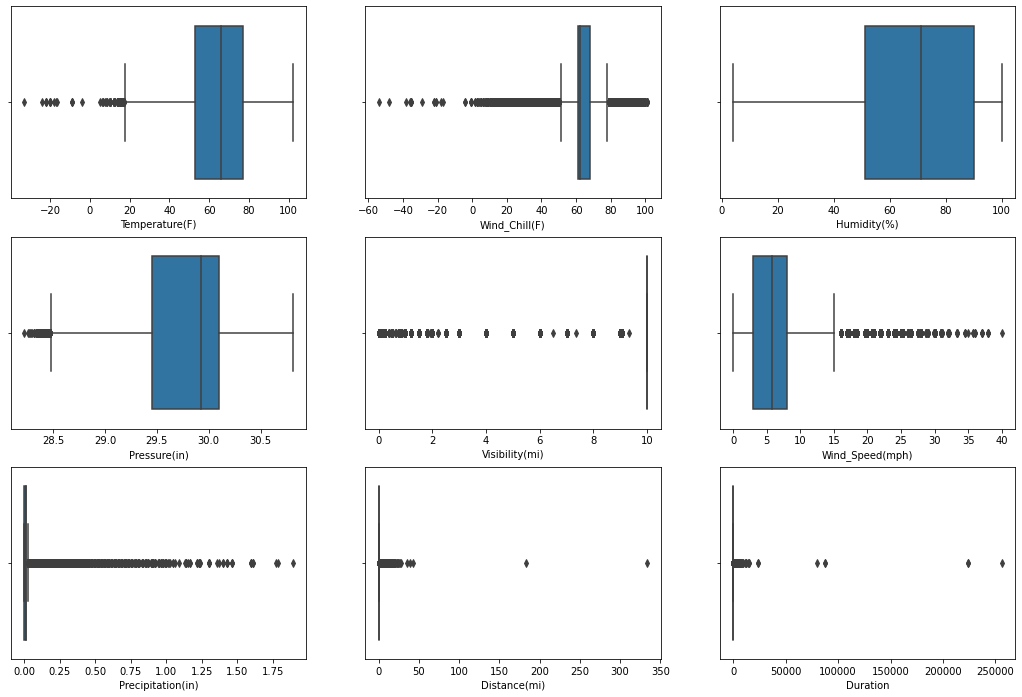

In [11]:
mask = data['Wind_Speed(mph)'] > 200
data.drop(data[mask].index,inplace=True)

cols = ['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)',
        'Wind_Speed(mph)','Precipitation(in)','Distance(mi)','Duration']
fig, ax = plt.subplots(3,3,figsize=(18,12))
r,c = 0,0
for col in cols:
    sns.boxplot(data[col],ax=ax[r,c])
    if c == 2:
        c = 0
        r += 1
    else: c += 1 
plt.show()

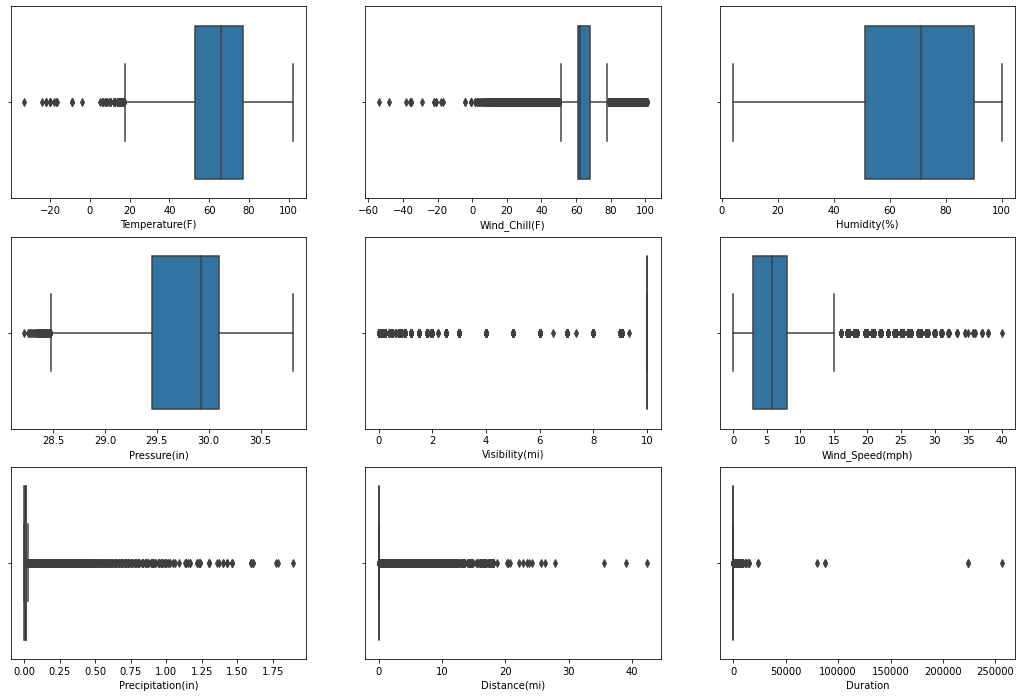

In [12]:
mask = data['Distance(mi)'] > 150
data.drop(data[mask].index,inplace=True)

cols = ['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)',
        'Wind_Speed(mph)','Precipitation(in)','Distance(mi)','Duration']
fig, ax = plt.subplots(3,3,figsize=(18,12))
r,c = 0,0
for col in cols:
    sns.boxplot(data[col],ax=ax[r,c])
    if c == 2:
        c = 0
        r += 1
    else: c += 1 
plt.show()

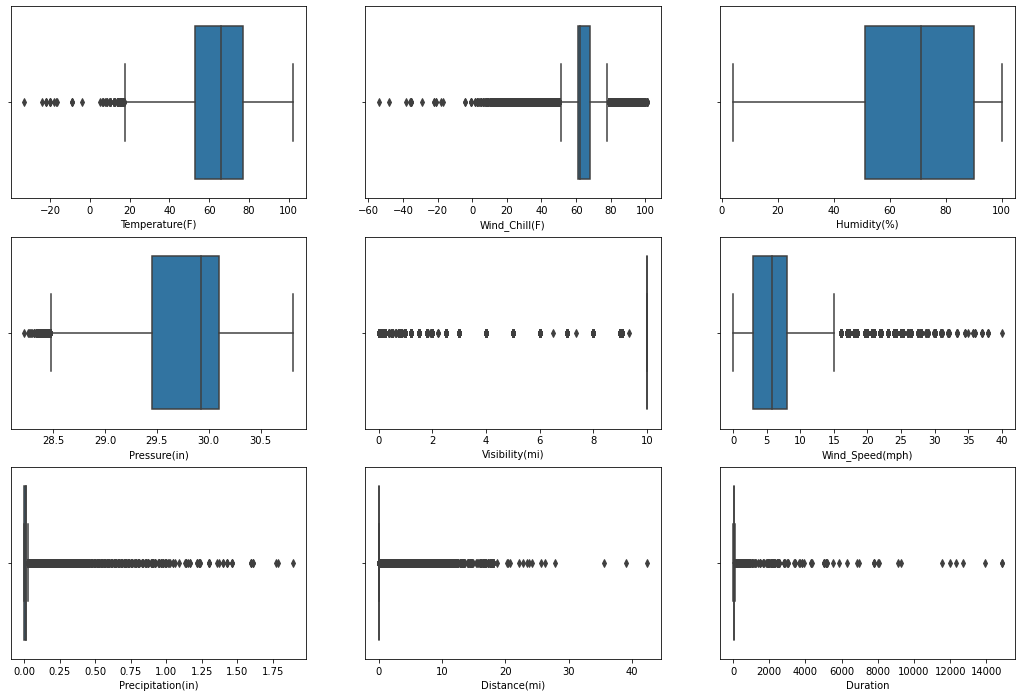

In [13]:
mask = data['Duration'] > 20000
data.drop(data[mask].index,inplace=True)

cols = ['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)',
        'Wind_Speed(mph)','Precipitation(in)','Distance(mi)','Duration']
fig, ax = plt.subplots(3,3,figsize=(18,12))
r,c = 0,0
for col in cols:
    sns.boxplot(data[col],ax=ax[r,c])
    if c == 2:
        c = 0
        r += 1
    else: c += 1 
plt.show()

3.特征编码
=

In [14]:
data['Source'].value_counts()

MapQuest         184374
Bing              28080
MapQuest-Bing       243
Name: Source, dtype: int64

In [15]:
data = data.join(pd.get_dummies(data['Source']))
data.drop(['Source'],axis=1,inplace=True)
data.shape

(212697, 45)

In [16]:
data['Side'].unique()

array(['L', 'R'], dtype=object)

In [17]:
maps = {'L':0,'R':1}

data['Side'] = data['Side'].map(maps)
data['Side'].unique()

array([0, 1], dtype=int64)

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Sunrise_Sunset'] = le.fit_transform(data['Sunrise_Sunset'])
data['Civil_Twilight'] = le.fit_transform(data['Civil_Twilight'])
data['Nautical_Twilight'] = le.fit_transform(data['Nautical_Twilight'])
data['Astronomical_Twilight'] = le.fit_transform(data['Astronomical_Twilight'])
data[['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']].head(5)

,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
146278,0,0,0,0
146285,1,1,0,0
146291,1,1,1,1
146294,1,1,1,1
146295,1,1,1,1


In [19]:
boolCols = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway',
            'Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']
for col in boolCols:
    data[col] = data[col] * 1
data['Amenity'].unique()

array([0, 1])

In [20]:
data['Weather_Condition'].unique()

array(['Heavy Rain', 'Rain', 'Mostly Cloudy', 'Overcast', 'Light Rain',
       'Clear', 'Fair', 'Drizzle', 'Fog', 'Scattered Clouds',
       'Partly Cloudy', 'Light Drizzle', 'Mist', 'Haze',
       'Light Freezing Fog', 'Shallow Fog', 'Smoke', 'Thunderstorm',
       'Light Thunderstorms and Rain', 'Thunderstorms and Rain',
       'Heavy Thunderstorms and Rain', 'Patches of Fog', 'Light Snow',
       'Cloudy', 'Light Rain with Thunder', 'Light Rain / Windy',
       'Rain / Windy', 'Wintry Mix', 'N/A Precipitation', 'Fair / Windy',
       'Heavy Drizzle', 'Mostly Cloudy / Windy', 'Cloudy / Windy',
       'T-Storm', 'Heavy T-Storm', 'Thunder in the Vicinity', 'Thunder',
       'Heavy Rain / Windy', 'T-Storm / Windy', 'Heavy T-Storm / Windy',
       'Partly Cloudy / Windy', 'Thunder / Windy', 'Snow', 'Fog / Windy',
       'Drizzle and Fog', 'Light Rain Shower', 'Haze / Windy',
       'Light Freezing Rain', 'Light Hail', 'Light Rain Showers',
       'Light Freezing Drizzle', 'Heavy Snow', '

In [21]:
map1 = {i : 'Clear' for i in ['Clear','Fair','Fair / Windy']}

map2 = {i : 'Rain' for i in ['Heavy Rain','Rain','Light Rain','Drizzle','Light Drizzle','Light Rain / Windy',
                            'N/A Precipitation','Heavy Drizzle','Heavy Rain / Windy','Light Rain Shower',
                            'Light Freezing Rain','Light Rain Showers','Light Freezing Drizzle','Rain Showers','Rain / Windy']}

map3 = {i : 'Cloudy' for i in ['Mostly Cloudy','Scattered Clouds','Partly Cloudy','Cloudy',
                              'Mostly Cloudy / Windy','Cloudy / Windy','Partly Cloudy / Windy']}

map4 = {i : 'Dark' for i in ['Overcast','Fog','Mist','Haze','Light Freezing Fog','Shallow Fog',
                            'Smoke','Patches of Fog','Fog / Windy','Drizzle and Fog','Haze / Windy']}

map5 = {i : 'Scare' for i in ['Thunderstorm','Light Thunderstorms and Rain','Thunderstorms and Rain',
                             'Heavy Thunderstorms and Rain','Light Rain with Thunder','T-Storm',
                             'Heavy T-Storm','Thunder in the Vicinity','Thunder','T-Storm / Windy',
                             'Heavy T-Storm / Windy','Thunder / Windy']}

map6 = {i : 'Snow' for i in ['Light Snow','Snow','Wintry Mix','Light Hail','Heavy Snow','Light Snow / Windy']}

maps = {**map1,**map2,**map3,**map4,**map5,**map6}

data['Weather_Condition'] = data['Weather_Condition'].map(maps)
print(data['Weather_Condition'].unique())
print(data['Weather_Condition'].isnull().sum())

['Rain' 'Cloudy' 'Dark' 'Clear' 'Scare' 'Snow']
0


In [22]:
data = data.join(pd.get_dummies(data['Weather_Condition']))
data.drop(['Weather_Condition'],axis=1,inplace=True)
data.shape

(212697, 50)

In [23]:
data['Wind_Direction'].unique()

array(['West', 'SSW', 'WSW', 'SW', 'North', 'Calm', 'CALM', 'East', 'NNE',
       'NW', 'WNW', 'NE', 'NNW', 'ENE', 'ESE', 'Variable', 'SSE', 'South',
       'SE', 'S', 'E', 'W', 'N', 'VAR'], dtype=object)

In [24]:
map1 = {i : 'PeaceWind' for i in ['Calm','CALM']}
map2 = {i : 'VARWind' for i in ['Variable','VAR']}
map3 = {i : 'DirectionWind' for i in ['West','SSW', 'WSW', 'SW', 'North','East', 'NNE',
                                     'NW', 'WNW', 'NE', 'NNW', 'ENE', 'ESE','SSE', 'South',
                                     'SE', 'S', 'E', 'W', 'N']}
maps = {**map1,**map2,**map3}
data['Wind_Direction'] = data['Wind_Direction'].map(maps)
print(data['Wind_Direction'].unique())
print(data['Wind_Direction'].isnull().sum())

['DirectionWind' 'PeaceWind' 'VARWind']
0


In [25]:
data = data.join(pd.get_dummies(data['Wind_Direction']))
data.drop(['Wind_Direction'],axis=1,inplace=True)
data.shape

(212697, 52)

In [26]:
data['Airport_Code'].unique()

array(['KAND', 'KGRD', 'KEOE', 'KAGS', 'KAIK', 'KDNL', 'KLUX', 'KBNL',
       'KCEU', 'K27A', 'KHQU', 'KSPA', 'KEHO', 'KUZA', 'KCPC', 'KCDN',
       'KCUB', 'KCAE', 'KGMU', 'KGYH', 'KLKR', 'KUDG', 'KCRE', 'KFDW',
       'KHYW', 'KHVS', 'KDYB', 'KNBC', 'KOGB', 'KRBW', 'KFLO', 'KEQY',
       'KMYR', 'KGSP', 'KBBP', 'KMNI', 'KLQK', 'KDCM', 'KLBT', 'KCHS',
       'KSSC', 'KCKI', 'KSMS', 'KSAV', 'KMKS', 'KGGE', 'KAKH', 'KMMT',
       'KMAO', 'KJZI', 'KCQW', 'KLRO', 'KARW', 'KTOC', 'KJYL', 'KHXD',
       'KMEB'], dtype=object)

In [27]:
data.dtypes == 'object'

TMC                      False
Severity                 False
Start_Lat                False
Start_Lng                False
Distance(mi)             False
Street                    True
Side                     False
City                      True
County                    True
Zipcode                   True
Airport_Code              True
Temperature(F)           False
Wind_Chill(F)            False
Humidity(%)              False
Pressure(in)             False
Visibility(mi)           False
Wind_Speed(mph)          False
Precipitation(in)        False
Amenity                  False
Bump                     False
Crossing                 False
Give_Way                 False
Junction                 False
No_Exit                  False
Railway                  False
Roundabout               False
Station                  False
Stop                     False
Traffic_Calming          False
Traffic_Signal           False
Sunrise_Sunset           False
Civil_Twilight           False
Nautical

In [28]:
len((data['County'] + data['City'] + data['Street']).unique())

30117

In [29]:
data['County'] = data['County'].str.lower()
data['City'] = data['City'].str.lower()
data['Street'] = data['Street'].str.lower()

data['County'] = data['County'].str.replace(' ','')
data['City'] = data['City'].str.replace(' ','')
data['Street'] = data['Street'].str.replace(' ','')

len((data['County'] + data['City'] + data['Street']).unique())

25654

In [30]:
data['Street']

146278         ashleyst
146285       bypass25ne
146291     schighway219
146294       bypass72nw
146295     hazelgroverd
               ...     
4231741           i-20w
4231743           i-26e
4231744           i-26w
4231752           i-26w
4232214         brucerd
Name: Street, Length: 212697, dtype: object

In [31]:
# street = data['Street'].str.extract("(\w+)")
# len(street[street.columns[0]].unique())
data.drop(['Street'],axis=1,inplace=True)

In [32]:
data.loc[data['County'] == data['City'],'City'] = ''
len((data['County'] + data['City']).unique())

506

In [33]:
data['Site'] = data['County'] + data['City']
data['Site'].head(5)

146278         andersoniva
146285           greenwood
146291            newberry
146294           greenwood
146295    aikenbeechisland
Name: Site, dtype: object

In [34]:
data.drop(['County','City'],axis=1,inplace=True)
data['Airport_Code'] = data['Airport_Code'].str.lower()
data['Zipcode'] = data['Zipcode'].str.lower()
data[['Airport_Code','Zipcode']].head(5)

,Airport_Code,Zipcode
146278,kand,29655-9004
146285,kgrd,29646-3029
146291,keoe,29108
146294,kgrd,29649-1300
146295,kags,29842-7685


In [35]:
len((data['Site'] + data['Airport_Code'] + data['Zipcode']).unique())

47546

In [36]:
zipcode = data['Zipcode'].str.extract("(\d+)")
len(zipcode[zipcode.columns[0]].unique())

383

In [37]:
data['Zipcode'] = data['Zipcode'].str.extract("(\d+)")
len(data['Zipcode'].unique())

383

In [38]:
len((data['Site'] + data['Airport_Code'] + data['Zipcode']).unique())

584

In [39]:
data['Site'] = data['Site'] + data['Airport_Code'] + data['Zipcode']
data['Site'].head(5)

146278         andersonivakand29655
146285           greenwoodkgrd29646
146291            newberrykeoe29108
146294           greenwoodkgrd29649
146295    aikenbeechislandkags29842
Name: Site, dtype: object

In [40]:
data.drop(['Airport_Code','Zipcode'],axis=1,inplace=True)
data.shape

(212697, 48)

In [41]:
data.columns

Index(['TMC', 'Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Side',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month', 'Day', 'Hour', 'Weekday',
       'Duration', 'Bing', 'MapQuest', 'MapQuest-Bing', 'Clear', 'Cloudy',
       'Dark', 'Rain', 'Scare', 'Snow', 'DirectionWind', 'PeaceWind',
       'VARWind', 'Site'],
      dtype='object')

In [42]:
'''直接转换我的内存估计会爆炸。。。所以要优化一下数据'''
# data = data.join(pd.get_dummies(data['Site']))
def reduce_mem_usage(props):
    # 计算当前内存
    start_mem_usg = props.memory_usage().sum() / 1024 ** 2
    print("Memory usage of the dataframe is :", start_mem_usg, "MB")
    
    # 哪些列包含空值，空值用-999填充。why：因为np.nan当做float处理
    NAlist = []
    for col in props.columns:
        if (props[col].dtypes != object):
            # 判断是否是int类型
            isInt = False
            mmax = props[col].max()
            mmin = props[col].min()
            if not np.isfinite(props[col]).all():
                NAlist.append(col)
                props[col].fillna(0, inplace=True) # 用0填充

            asint = props[col].fillna(0).astype(np.int64)
            result = np.fabs(props[col] - asint)
            result = result.sum()
            if result < 0.01: # 绝对误差和小于0.01认为可以转换的，要根据task修改
                isInt = True
            
            if isInt:
                if mmin >= 0: # 最小值大于0，转换成无符号整型
                    if mmax <= 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mmax <= 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mmax <= 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else: # 转换成有符号整型
                    if mmin > np.iinfo(np.int8).min and mmax < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mmin > np.iinfo(np.int16).min and mmax < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mmin > np.iinfo(np.int32).min and mmax < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mmin > np.iinfo(np.int64).min and mmax < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)  
            else: # 注意：这里对于float都转换成float16，需要根据你的情况自己更改
                props[col] = props[col].astype(np.float16)
            
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [43]:
data, nalist = reduce_mem_usage(data)
data.info()

Memory usage of the dataframe is : 59.49385452270508 MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  25.416118621826172  MB
This is  42.72057816009624 % of the initial size
<class 'pandas.core.frame.DataFrame'>
Int64Index: 212697 entries, 146278 to 4232214
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TMC                    212697 non-null  uint16 
 1   Severity               212697 non-null  uint8  
 2   Start_Lat              212697 non-null  float16
 3   Start_Lng              212697 non-null  float16
 4   Distance(mi)           212697 non-null  float16
 5   Side                   212697 non-null  uint8  
 6   Temperature(F)         212697 non-null  float16
 7   Wind_Chill(F)          212697 non-null  float16
 8   Humidity(%)            212697 non-null  float16
 9   Pressure(in)           212697 non-null  float16
 10  Visibility(mi)         212697 non-null  float16
 11  Wind_S

In [44]:
nalist

[]

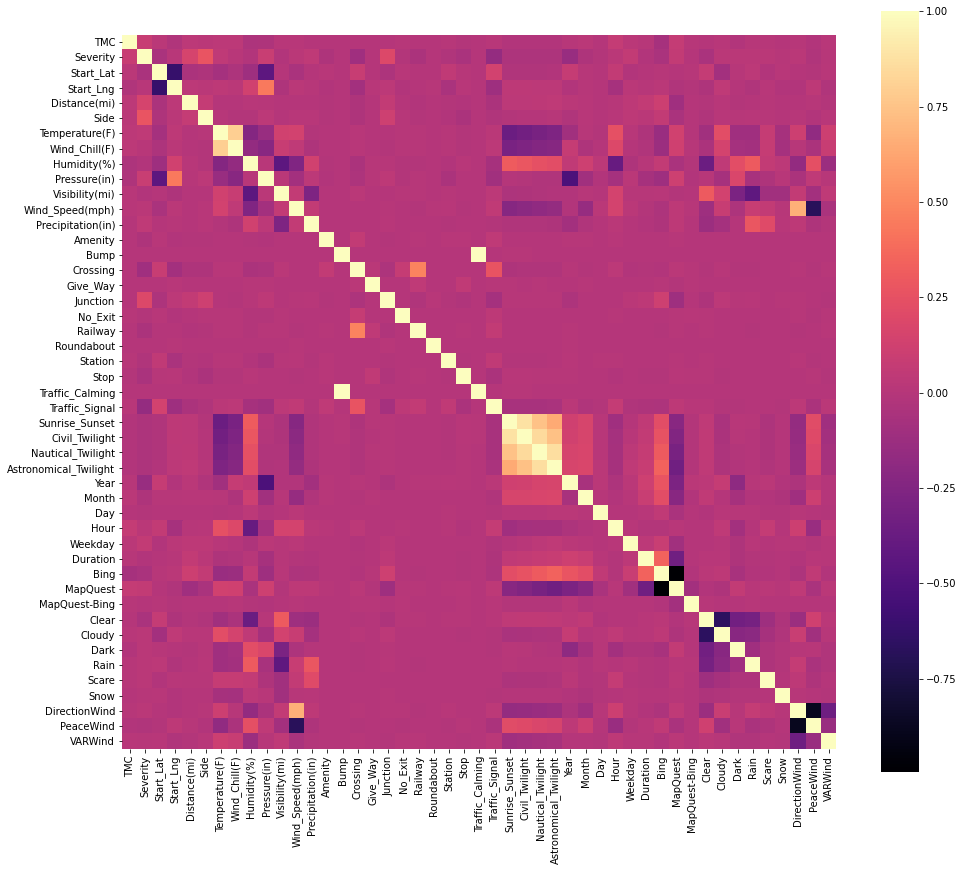

In [45]:
plt.figure(figsize=(16,14))
sns.heatmap(data.corr(),cmap='magma',square=True,annot=False)
plt.show()

In [46]:
'''去除共线特征'''
data.drop(['Traffic_Calming','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','PeaceWind'],axis=1,inplace=True)
data.shape

(212697, 43)

In [47]:
data.loc[data['MapQuest-Bing']==1,'Bing'] = 1
data.loc[data['MapQuest-Bing']==1,'MapQuest'] = 1

data.drop(['MapQuest-Bing','Year'],axis=1,inplace=True)

data = data.reset_index(drop=True)
data.head(5)

,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Side,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,MapQuest,Clear,Cloudy,Dark,Rain,Scare,Snow,DirectionWind,VARWind,Site
0,201,2,34.31250,-82.6875,0.010002,0,64.87500,62.25,90.0,29.750000,...,1,0,0,0,1,0,0,1,0,andersonivakand29655
1,201,2,34.18750,-82.1250,0.010002,0,63.00000,62.25,93.0,29.765625,...,1,0,0,0,1,0,0,1,0,greenwoodkgrd29646
2,201,3,34.28125,-81.5625,0.010002,1,62.59375,62.25,100.0,29.796875,...,1,0,1,0,0,0,0,1,0,newberrykeoe29108
3,201,2,34.21875,-82.1875,0.010002,0,64.00000,62.25,90.0,29.781250,...,1,0,0,1,0,0,0,1,0,greenwoodkgrd29649
4,201,2,33.46875,-81.8750,0.010002,1,68.00000,62.25,87.0,29.812500,...,1,0,0,0,1,0,0,1,0,aikenbeechislandkags29842


In [48]:
data.shape

(212697, 41)

In [49]:
data = data.join(pd.get_dummies(data['Site']))
data.drop(['Site'],axis=1,inplace=True)
data, nalist = reduce_mem_usage(data) 
data.info()

Memory usage of the dataframe is : 129.00869369506836 MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  129.00869369506836  MB
This is  100.0 % of the initial size
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212697 entries, 0 to 212696
Columns: 624 entries, TMC to yorksmyrnakakh29743
dtypes: float16(10), uint16(2), uint8(612)
memory usage: 129.0 MB


In [50]:
data.to_csv("M:/DataSet/usaccident/real/cleanData.csv")